In [78]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Reading in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv",index_col=0)

            type  ...             genre
show_id           ...                  
s2         Movie  ...            Dramas
s3         Movie  ...     Horror Movies
s4         Movie  ...            Action
s5         Movie  ...            Dramas
s6       TV Show  ...  International TV

[5 rows x 10 columns]
The most frequent movie duration in the 1990s is: 93


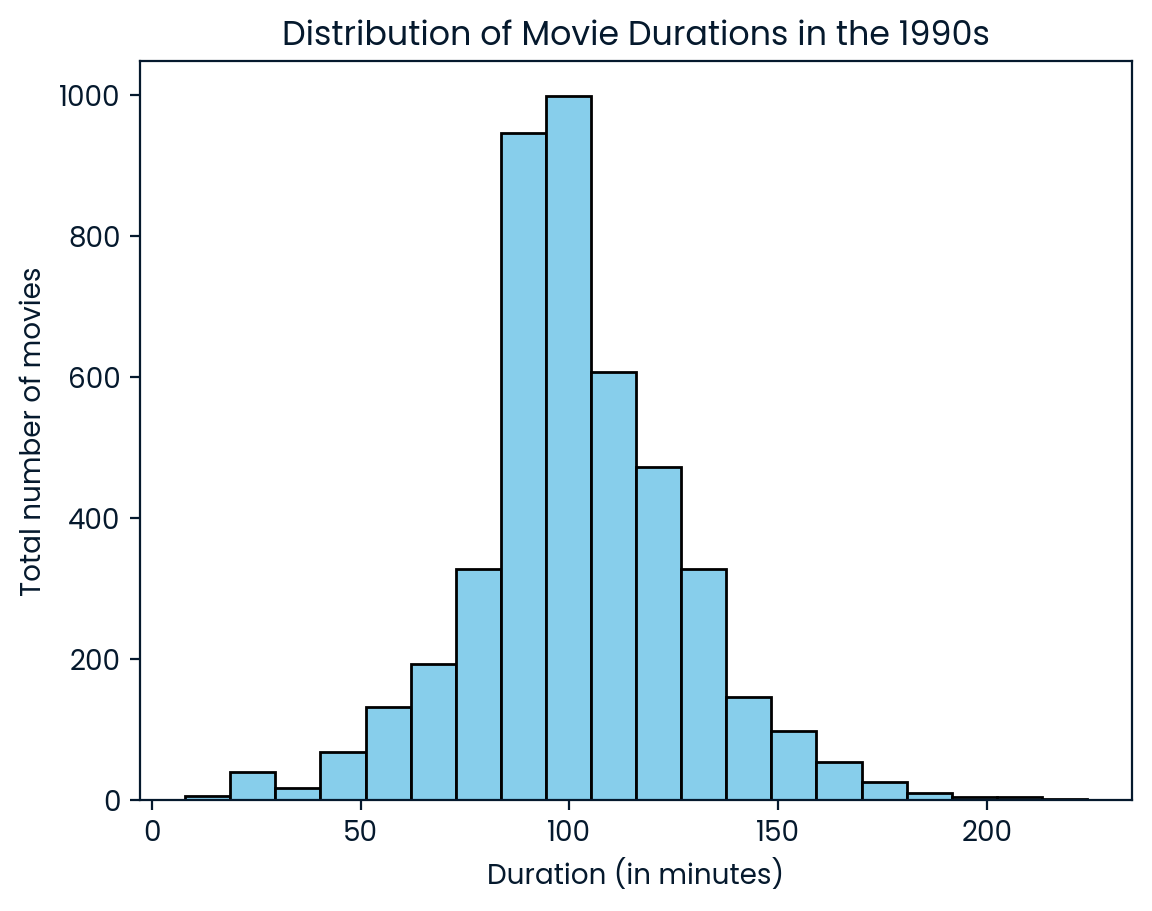

In [79]:
#Checking the data
print(netflix_df.head())
mov=netflix_df[netflix_df['type']=='Movie']

#now filtering movies released from 1990 and latest
movies_90s=mov[mov['release_year']>=1990]

duration = movies_90s['duration']

# Finding the most frequent movie duration using mode
most_frequent_duration = int(duration.mode()[0])  

# Printing the most frequent duration
print(f"The most frequent movie duration in the 1990s is: {most_frequent_duration}")

# Creating a histogram of movie durations
plt.hist(duration, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Total number of movies')
plt.show()

# Saving the most frequent duration as an integer variable
duration = most_frequent_duration




In [80]:
# Filtering the data to keep only the movies from the 1990s
movie_type = netflix_df[netflix_df['type'] == 'Movie']

#Counting total number of movies in 1990s ie From 1990-1999
movies_1990s = movie_type[(movie_type['release_year'] >= 1990) & (movie_type['release_year'] < 2000)]

# Filtering the data again to keep only the Action movies from the 1990s
action_movies_1990s = movies_1990s[movies_1990s['genre'] == 'Action']

short_movie_count = 0

# Iterating over the rows and checking the duration
for label, row in action_movies_1990s.iterrows():
    if row['duration'] < 90:
        short_movie_count += 1
    
# Print the total count of short action movies
print(f"Total short action movies (under 90 minutes): {short_movie_count}")


Total short action movies (under 90 minutes): 7


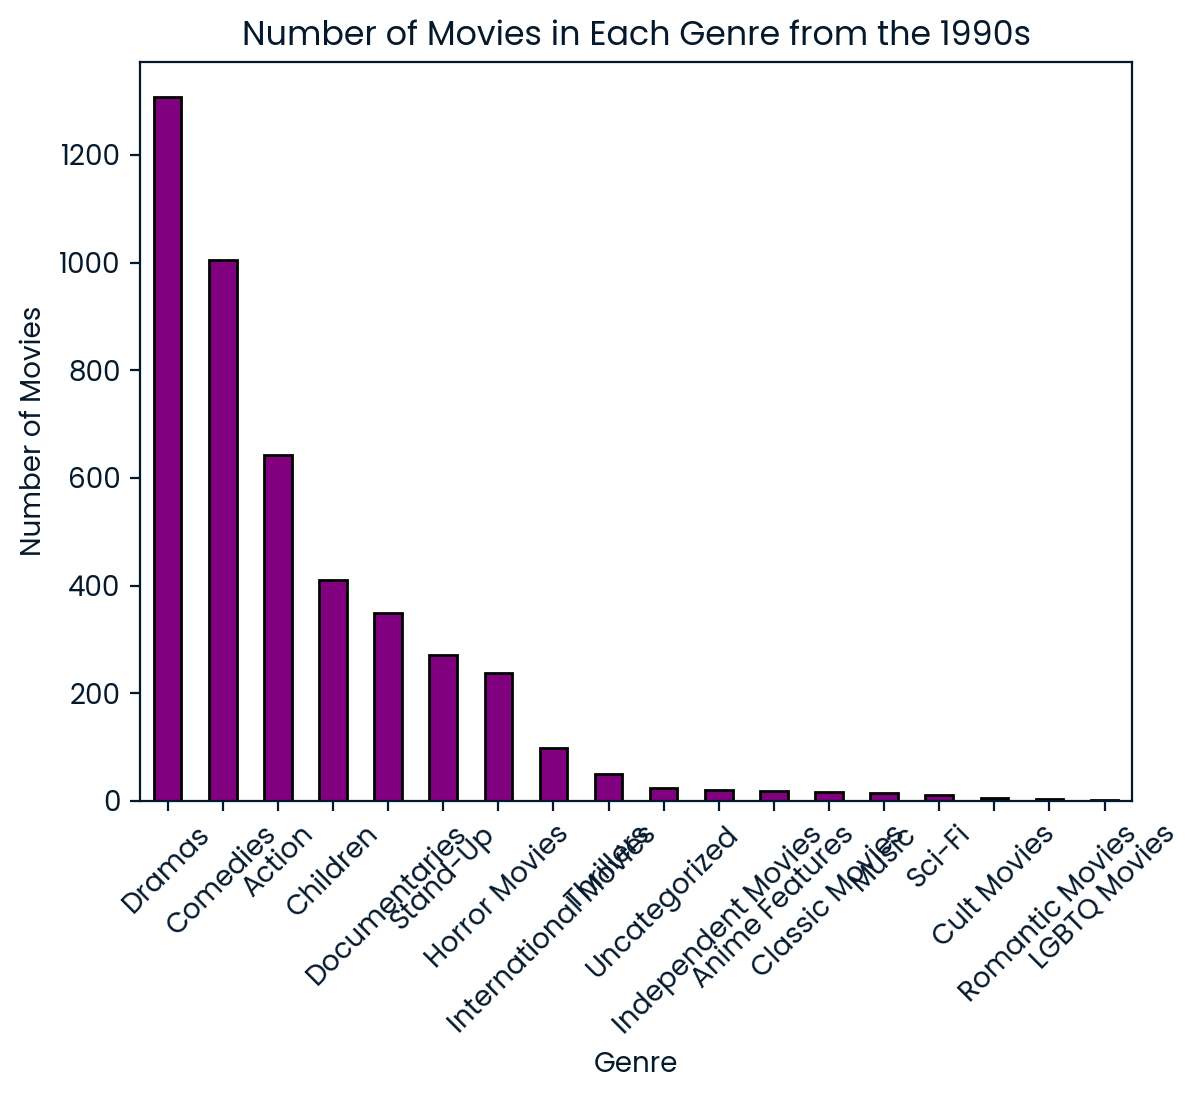

In [81]:
# Counting the number of movies for each genre in the 1990s
genre_counts = movies_90s['genre'].value_counts()

# Plotting a bar chart for the genre counts
genre_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Movies in Each Genre from the 1990s')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


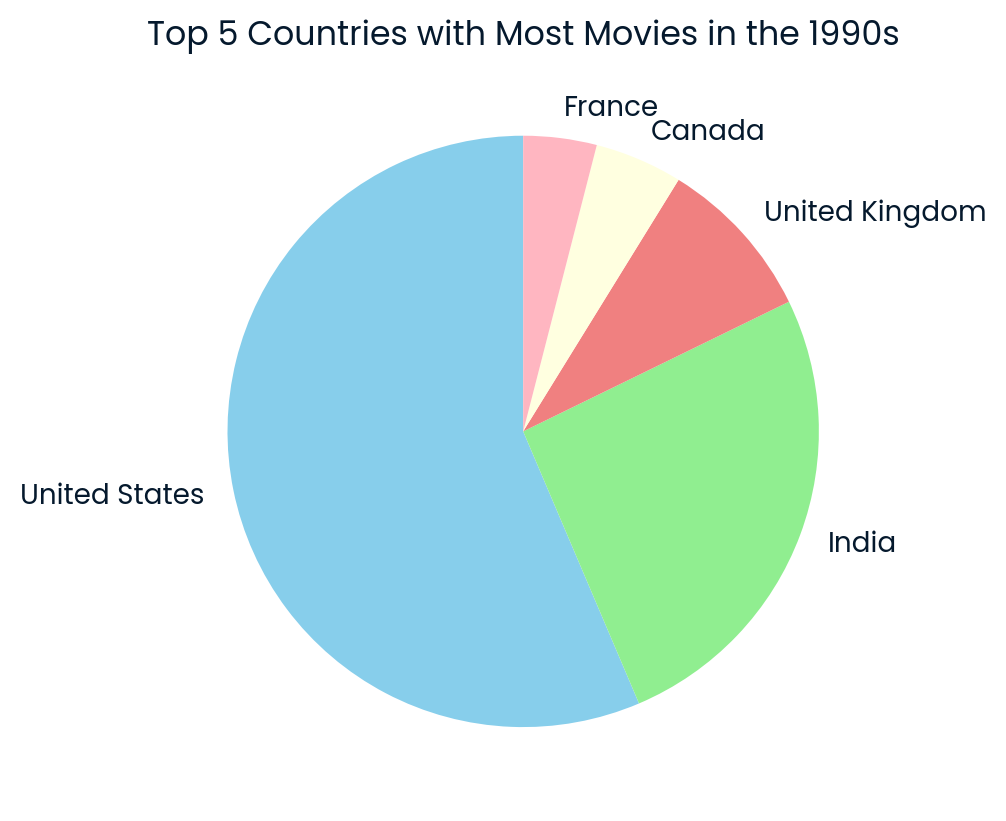

In [82]:
# Getting the top 5 countries with the most movies
top_countries = movies_90s['country'].value_counts().head(5)

# Plotting a pie chart for the top 5 countries without percentage labels
top_countries.plot(kind='pie', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
plt.title('Top 5 Countries with Most Movies in the 1990s')
plt.ylabel('')
plt.show()


In [75]:
import random

def recommend_movie_by_genre(genre):
    # Filtering movies by the specified genre
    genre_movies = movies_90s[movies_90s['genre'] == genre]
    if not genre_movies.empty:
        # Recommending a random movie
        recommended_movie = random.choice(genre_movies['title'].tolist())
        return recommended_movie
    else:
        return "No movies found for this genre."

# Ask the user for a genre
chosen_genre = input("Enter a genre (e.g., Action, Comedies, Dramas, Horror Movies, Children, International TV, TV Shows): ")

# Recommend a movie based on the genre input
recommended_movie = recommend_movie_by_genre(chosen_genre)
print(f"Recommended {chosen_genre} Movie: {recommended_movie}")


Enter a genre (e.g., Action, Comedies, Dramas, Horror Movies, Children, International TV, TV Shows): 

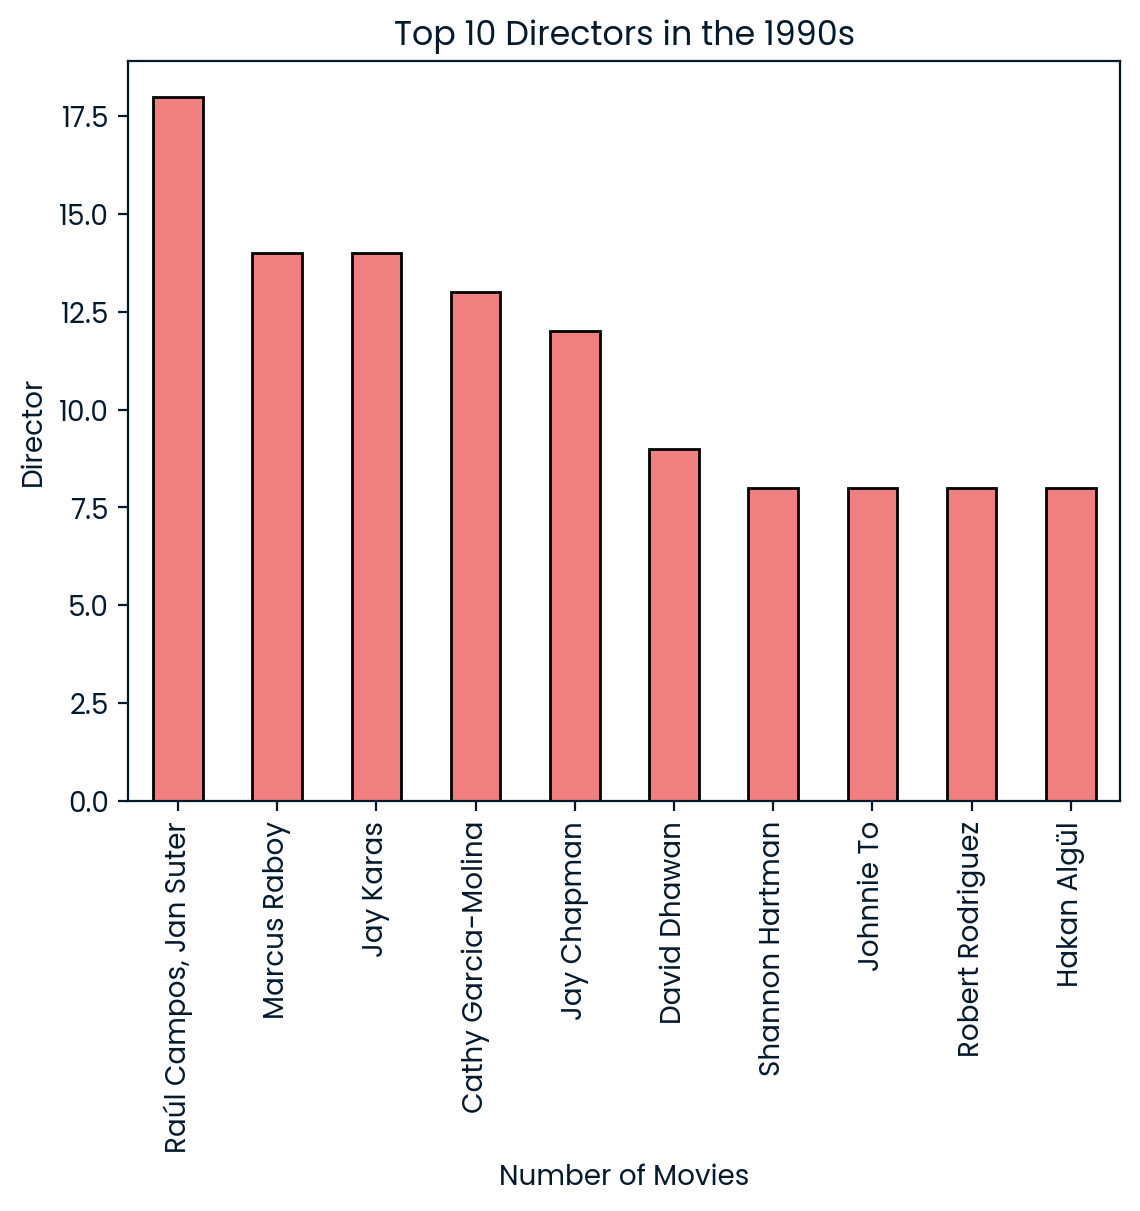

In [77]:
# Counting the top 10 directors with most movies
top_directors = movies_90s['director'].value_counts().head(10)

# Plotting the top directors
top_directors.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Top 10 Directors in the 1990s')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()
